In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data cleaning

In [3]:
transaction = pd.read_excel('QVI_transaction_data.xlsx')
pur_behavior = pd.read_csv('QVI_purchase_behaviour.csv')

transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
pur_behavior.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [7]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [9]:
pur_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
#change DATE column to date format
transaction['DATE'] = pd.to_datetime(transaction['DATE'], unit='D', origin='1899-12-30')
print(transaction['DATE'].dtype)

datetime64[ns]


we can merge the two dataset since they have same column:LYLTY_CARD_NBR 

In [19]:
df = pd.merge(transaction, pur_behavior, on='LYLTY_CARD_NBR')
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [27]:
#check duplicate values
df[df.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,OLDER SINGLES/COUPLES,Premium


In [31]:
df.drop_duplicates()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


find out which products are potato chips

In [33]:
df['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [41]:
#remove salsa item
df['PROD_NAME'].astype('string')

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: string

In [45]:
df['PROD_NAME'] = df['PROD_NAME'].str.replace('  ', ' ')
df['PROD_NAME']

0                 Natural Chip  Compny SeaSalt175g
1                            CCs Nacho Cheese 175g
2            Smiths Crinkle Cut Chips Chicken 170g
3            Smiths Chip Thinly S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832                Tostitos Splash Of Lime 175g
264833                       Doritos Mexicana 170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835                Tostitos Splash Of Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

In [49]:
df = df[~df['PROD_NAME'].str.contains('salsa', case=False, na=False)]
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [51]:
df['PROD_NAME'].value_counts()

PROD_NAME
Kettle Mozzarella Basil & Pesto 175g        3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps  Ched & Chives 165g         3268
Cobs Popd Sea Salt Chips 110g               3265
                                            ... 
Sunbites Whlegrn Crisps Frch/Onin 90g       1432
RRD Pc Sea Salt  165g                       1431
NCC Sour Cream & Garden Chives 175g         1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut  Original 175g               1410
Name: count, Length: 105, dtype: int64

## Data visualization 

/var/folders/xc/kqt7c1d91z1f5mjc3g1zlk6h0000gn/T/ipykernel_87447/2360652102.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


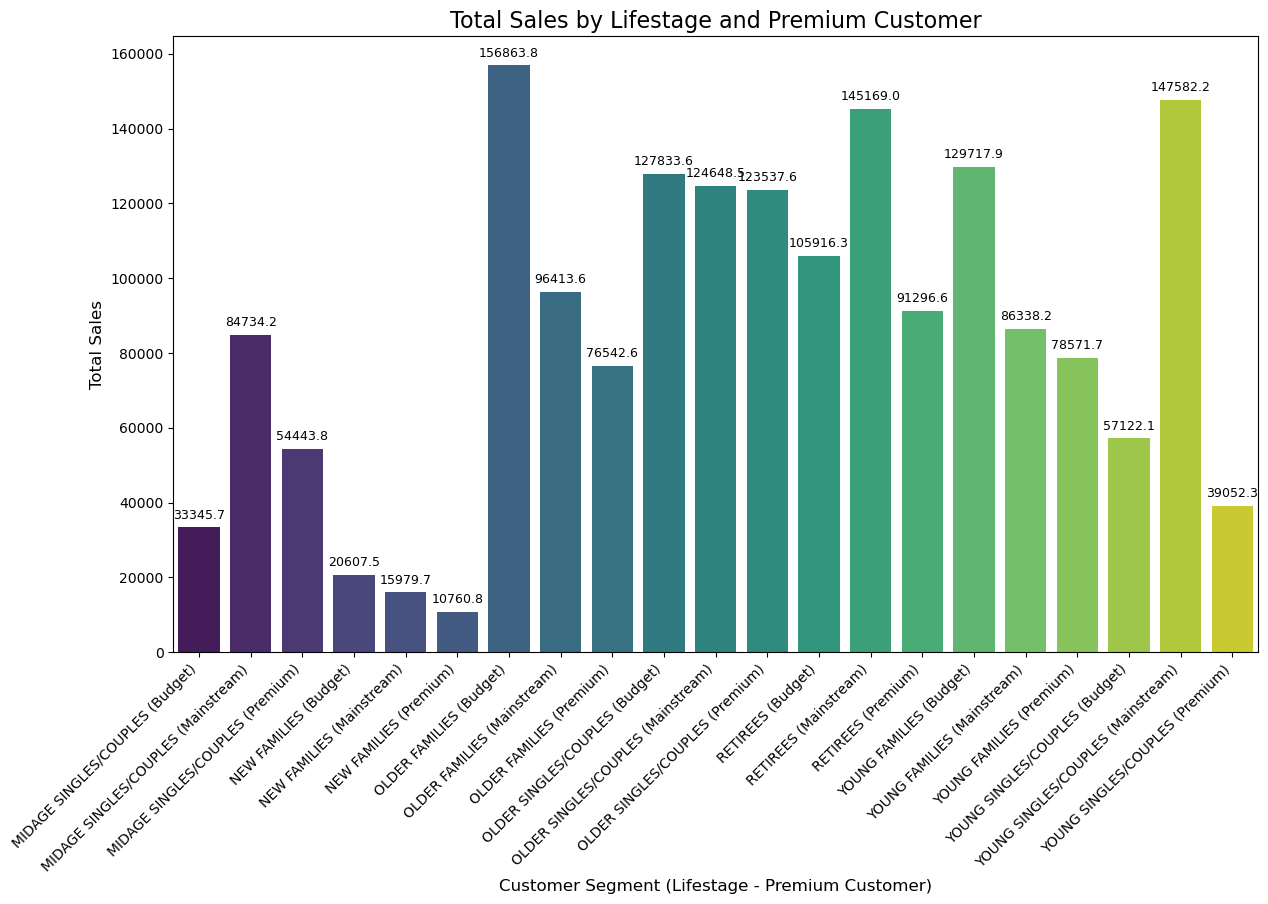

In [101]:
grouped_sales = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
grouped_sales['LIFESTAGE_PREMIUM'] = grouped_sales['LIFESTAGE'] + ' (' + grouped_sales['PREMIUM_CUSTOMER'] + ')'

plt.figure(figsize=(14, 8))

barplot = sns.barplot(
    x='LIFESTAGE_PREMIUM',
    y='TOT_SALES',
    data=grouped_sales,
    palette='viridis' 
)

plt.title('Total Sales by Lifestage and Premium Customer', fontsize=16)
plt.xlabel('Customer Segment (Lifestage - Premium Customer)', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.1f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points',
                     fontsize=9)
plt.show()

The top 3 sales contributors are:
1. Older families(budget)
2. Young singles/couple(mainstream)
3. Retirees(mainstream)

In [109]:
#check if higher sales due to there being more customers who buy chips.
customer_number = df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique().sort_values(ascending=True)
customer_number

LIFESTAGE               PREMIUM_CUSTOMER
NEW FAMILIES            Premium              575
                        Mainstream           830
                        Budget              1087
MIDAGE SINGLES/COUPLES  Budget              1474
OLDER FAMILIES          Premium             2232
MIDAGE SINGLES/COUPLES  Premium             2369
YOUNG FAMILIES          Premium             2398
YOUNG SINGLES/COUPLES   Premium             2480
YOUNG FAMILIES          Mainstream          2685
OLDER FAMILIES          Mainstream          2788
MIDAGE SINGLES/COUPLES  Mainstream          3298
YOUNG SINGLES/COUPLES   Budget              3647
RETIREES                Premium             3812
YOUNG FAMILIES          Budget              3953
RETIREES                Budget              4385
OLDER FAMILIES          Budget              4611
OLDER SINGLES/COUPLES   Premium             4682
                        Budget              4849
                        Mainstream          4858
RETIREES                Main

<Axes: ylabel='LIFESTAGE,PREMIUM_CUSTOMER'>

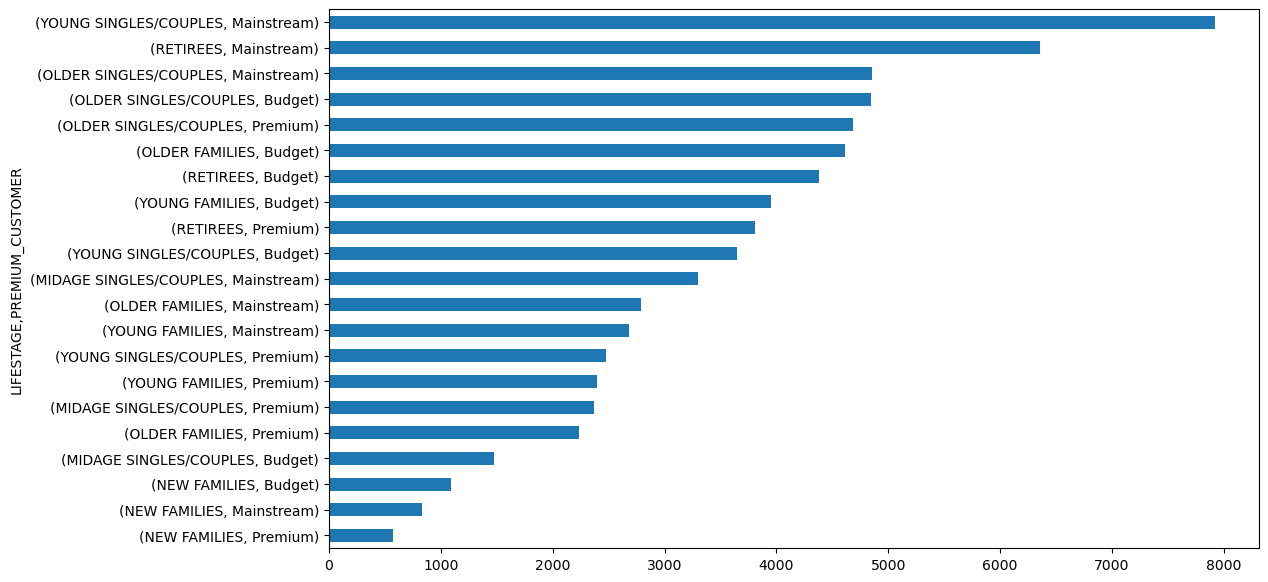

In [111]:
customer_number.plot.barh(figsize=(12,7))

we can see that Young singles/couple(mainstream) and Retirees(mainstream) have large group of people 

In [123]:
#  Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOME
units_avg = df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])['PROD_QTY'].sum()/df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique(0)
units_avg

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              6.026459
                        Mainstream          6.432080
                        Premium             6.078514
NEW FAMILIES            Budget              4.821527
                        Mainstream          4.891566
                        Premium             4.815652
OLDER FAMILIES          Budget              9.076773
                        Mainstream          9.255380
                        Premium             9.246864
OLDER SINGLES/COUPLES   Budget              6.781398
                        Mainstream          6.712021
                        Premium             6.769543
RETIREES                Budget              6.141847
                        Mainstream          5.925920
                        Premium             6.103358
YOUNG FAMILIES          Budget              8.722995
                        Mainstream          8.638361
                        Premium             8.716013
YOUNG

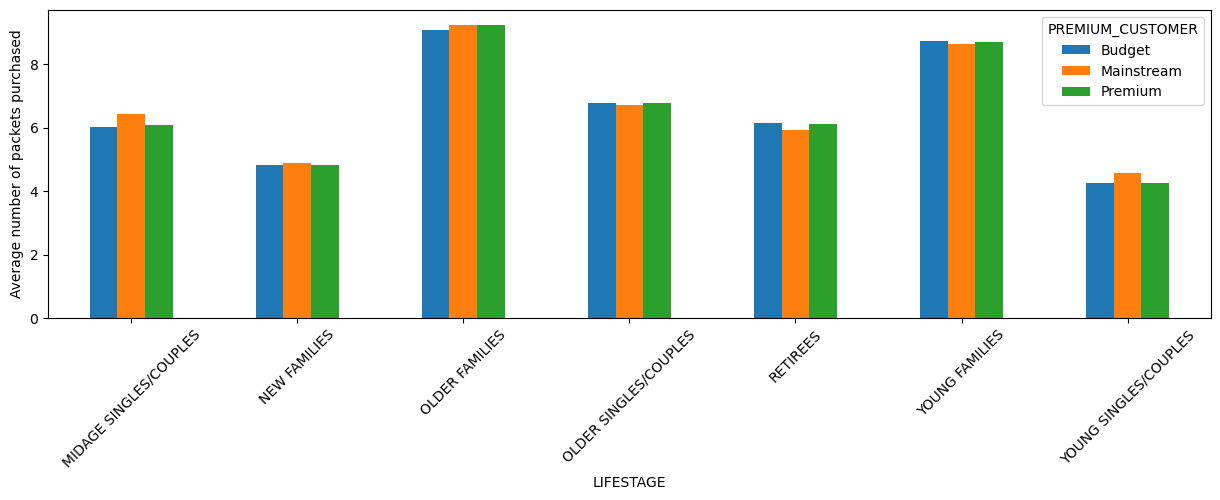

In [169]:

ax = units_avg.unstack('PREMIUM_CUSTOMER').fillna(0).plot.bar(stacked = False,figsize=(15, 4))

plt.ylabel("Average number of packets purchased")
plt.xticks(rotation=45)
plt.show()

we can see that older families and young families in general buy more chips per customer

In [155]:
# investigate the average price per unit chips bought for each customer segment
avg_sales = df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])['TOT_SALES'].sum()/df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])['PROD_QTY'].sum()
avg_sales

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              3.753878
                        Mainstream          3.994449
                        Premium             3.780823
NEW FAMILIES            Budget              3.931969
                        Mainstream          3.935887
                        Premium             3.886168
OLDER FAMILIES          Budget              3.747969
                        Mainstream          3.736380
                        Premium             3.708639
OLDER SINGLES/COUPLES   Budget              3.887529
                        Mainstream          3.822753
                        Premium             3.897698
RETIREES                Budget              3.932731
                        Mainstream          3.852986
                        Premium             3.924037
YOUNG FAMILIES          Budget              3.761903
                        Mainstream          3.722439
                        Premium             3.759232
YOUNG

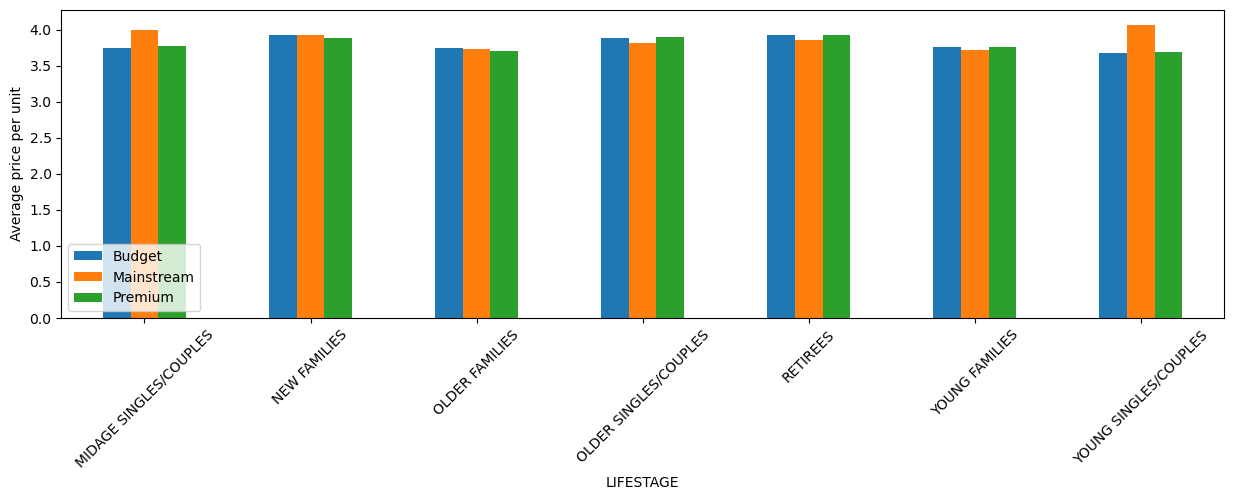

In [167]:
ax = avg_sales.unstack('PREMIUM_CUSTOMER').fillna(0).plot.bar(stacked = False,figsize=(15, 4))
plt.ylabel("Average price per unit")
plt.xticks(rotation=45)
plt.legend(loc='lower left')
plt.show()


Mainstream mid age and young singles and couples are more willing to pay more per
packet of chips compared to their budget and premium counterparts. This may be due
to premium shoppers being more likely to buy healthy snacks and when they buy
chips, this is mainly for entertainment purposes rather than their own consumption.
This is also supported by there being fewer premium midage and young singles and
couples buying chips compared to their mainstream counterparts.